# Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

В прошлых юнитах мы познакомились с корреляцией и её типами. В этом юните мы узнаем о наглядных способах представления корреляций пары признаков и корреляций признаков всего датасета.

В качестве датасета для визуализации корреляций возьмём новые данные о параметрах фигур девушек месяца журнала «Плейбой».

Набор данных содержит ~600 записей о девушках и восемь признаков:

* ``BMI`` — индекс массы тела (ИМТ)
* ``year`` — год размещения модели в журнале
* ``month`` — месяц размещения
* ``waist`` — обхват талии модели
* ``hips`` — обхват бёдер модели
* ``height`` — рост модели
* ``weight`` — вес модели
* ``waist/hip`` — соотношение обхвата талии и бёдер

Прочитаем датасет и приступим к изучению способов визуализации.

In [89]:
import pandas as pd
import numpy as np
import plotly.express as px

In [90]:
model_data = pd.read_csv('data/model.csv')
model_data

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
...,...,...,...,...,...,...,...,...
657,September,2008,25.000000,36.000000,67.000000,115.000000,18.010000,0.690000
658,October,2008,24.000000,34.000000,65.000000,115.000000,19.130000,0.710000
659,November,2008,21.000000,32.000000,66.000000,108.000000,17.430000,0.660000
660,December,2008,25.000000,35.000000,68.000000,115.000000,17.480000,0.710000


## МАТРИЦА КОРРЕЛЯЦИЙ

В случае большого количества данных в датасете матрица, возвращаемая методом pandas data.corr(), становится нечитаемой.

### Задание 6.1

Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.

In [91]:
model_data_corr = model_data[['Year', 'Waist', 'Hips', 'Height', 'Weight', 'BMI', 'Waist/Hip']].corr()
model_data_corr

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


Матрица получилась большой и потребовалось достаточно много времени, чтобы проанализировать все коэффициенты в этой матрице. А если признаков будет больше? Найти что-то в ней будет практически невозможно.

Поэтому специалисты по данным отдают предпочтение методам визуализации. Один из таких — тепловая матрица корреляций.



## ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ

Для построения такой матрицы нам будет необходима знакомая нам из модуля по визуализации библиотека seaborn.

Импортируем библиотеку для дальнейшего использования:

In [92]:
import seaborn as sns

Для построения тепловой матрицы корреляций мы воспользуемся методом sns.heatmap() библиотеки seaborn. 

Метод принимает на вход двумерный массив данных под аргументом data. Это может быть матрица корреляций, полученная методом df.corr(), матрица пропущенных значений, полученная методом df.isnull(), набор данных и многое другое. 

Передадим в метод heatmap() нашу матрицу корреляций corr():

In [93]:
fig = px.imshow(model_data_corr, aspect='auto', color_continuous_scale = 'RdBu_r')
fig

Чтобы было удобнее её интерпретировать, передадим параметр text_auto='.2f', чтобы отобразить коэффициент корреляции на пересечении признаков.

In [94]:
fig = px.imshow(model_data_corr, text_auto='.2f', aspect='auto', color_continuous_scale = 'RdBu_r')
fig.show()

На горизонтальной и вертикальной осях располагаются названия признаков нашего датасета. По главной диагонали — единицы. Матрица симметрична. Справа от матрицы располагается тепловая шкала коэффициентов корреляции: от минимума -0.42 (это корреляция между признаками waist/hip + hips) и максимума по шкале — 1. 

Такую тепловую матрицу очень удобно интерпретировать: в тёплых светлых оттенках отражена положительная корреляция между признаками, в тёмных холодных — отрицательная корреляция. Например, самая большая отрицательная взаимосвязь составляет -0.42, а самая большая положительная — 0.74.

С помощью такой матрицы очень удобно оценивать мультиколлинеарность в данных, делать выводы о связях между признаками.

Например, в нашем наборе данных мультиколлинеарность практически отсутствует, так как из материала прошлого модуля мы знаем, что она возникает из-за признаков с сильной и очень сильной корреляцией. По шкале корреляций это от 0.7 и выше; у нас есть такие признаки с корреляцией выше 0.7 (например: waist/hip + waist). Коэффициент корреляции лишь немного выше, поэтому такой признак, скорее всего, не будет удалён из набора данных. 

О критериях выбора признаков мы поговорим в следующих модулях разведывательного анализа данных.

Также у метода heatmap имеется много аргументов, которые позволяют настроить цветовую гамму графика, управлять его элементами и отображением.

## SCATTERPLOT

Иногда нам необходимо рассмотреть связь между признаками как распределение. Матрица корреляции может показать нам только силу связи и её направление (плюс/минус). Чтобы рассмотреть распределение и характер связи, существует точечная диаграмма рассеивания.

Точечная диаграмма рассеивания — это такая диаграмма, в которой каждое значение, которое принимает признак в датасете, отражено точкой.

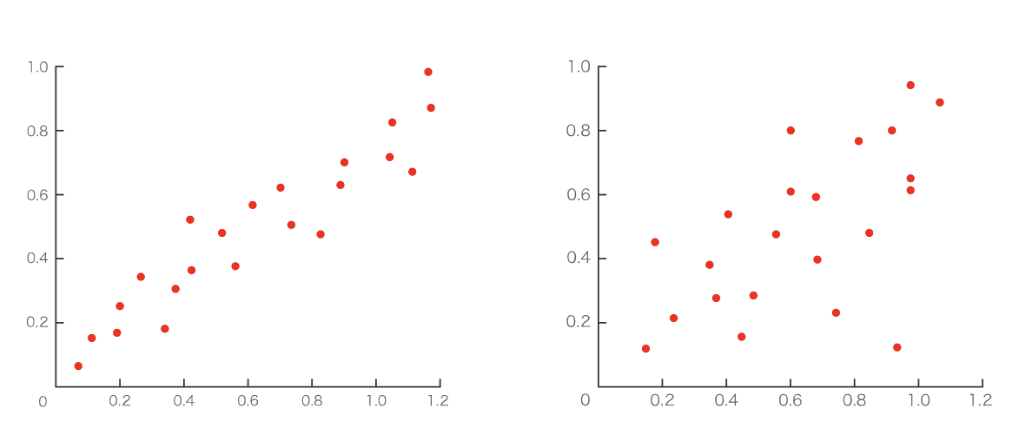

Подобная диаграмма помогает установить характер и силу связи признаков. Присвоив каждой оси переменную, мы можем определить наличие связи между переменными. Сила связи (коэффициент корреляции) зависит от того, насколько плотно расположены точки на диаграмме. Например, на рисунке слева точки расположены более плотно, чем справа. Это означает большую силу связи. 

Давайте построим такой график на примере нашего датасета и рассмотрим его детально.

Возьмём для примера две пары признаков:

* по оси x="Waist/Hip" — соотношение обхвата талии/бедер, по оси y="Waist" — обхват талии;
* по оси x="Weight" — вес модели, а по оси y="Year" — год размещения модели в журнале.

Построим для них точечную диаграмму:

In [95]:
fig = px.scatter(model_data, x="Waist/Hip", y="Waist")
fig.show()

где по оси x располагается признак Waist/Hip, а по оси y — признак Waist.

Построим диаграмму для следующей пары признаков и сравним их.

In [96]:
fig = px.scatter(model_data, x="Weight", y="Year")
fig.show()

Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

И если мы вернёмся к тепловой матрице корреляций, то увидим, что в первом случае корреляция составила 0.74, а во втором -0.011 — очень слабая связь. Получается, что при помощи графиков мы можем оценить коэффициент корреляции на глаз. 

Умение интерпретировать графики очень важно для дата-сайентиста и сокращает время работы над разведывательным анализом данных. Опытным специалистам по данным требуется несколько секунд, чтобы определить характер связи: линейная/нелинейная, прямая/обратная, — а также силу связи, или коэффициент корреляции. 

Чтобы делать это так же быстро, необходимо помнить несколько правил. Давайте повторим их и закрепим эти знания визуализацией. 

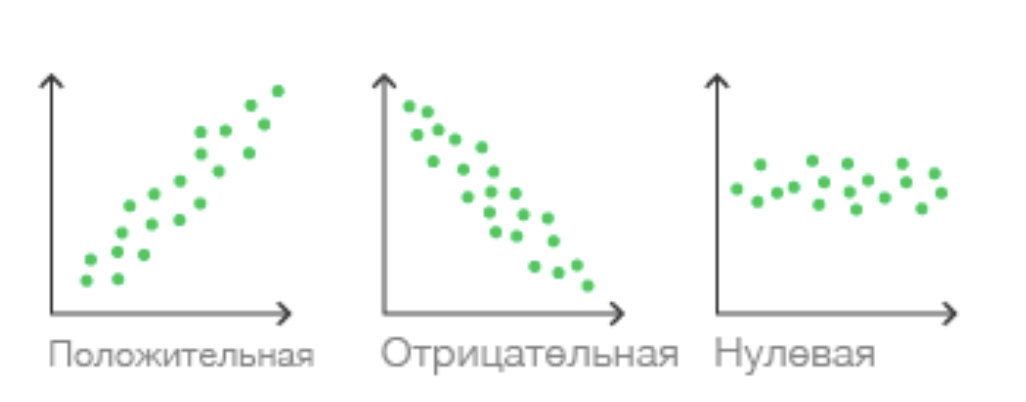

* При положительной корреляции увеличение одного признака приводит к увеличению другого. И наоборот.
* При отрицательной связи увеличение одного из признаков приводит к уменьшению другого и наоборот.
* При нулевой корреляции признаки распределяются независимо друг от друга, что видно на рисунке.

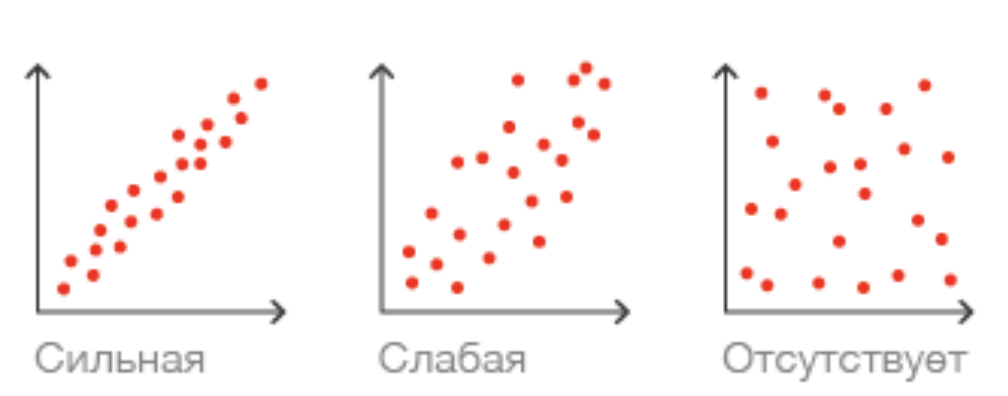

При сильной связи точки на графике расположены близко друг к другу. Чем связь слабее, тем дальше находятся точки друг от друга. На графике изображена сильная связь с коэффициентом корреляции ~0.95, слабая с коэффициентом корреляции ~0.5 и нулевая корреляция.

Диаграмма рассеивания в данных — удобный инструмент анализа, но, к сожалению, только для пары признаков. Тепловая матрица корреляций удобна для анализа всего датасета, но показывает только силу и направления корреляции (плюс/минус), а информации о распределении признаков мы не получаем. 

Существует ли что-то, что объединяет лучшее из этих подходов? Да!

Это график попарных отношений в библиотеке seaborn.

## ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT

/Users/sayonara/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sayonara/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sayonara/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sayonara/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sayonara/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore

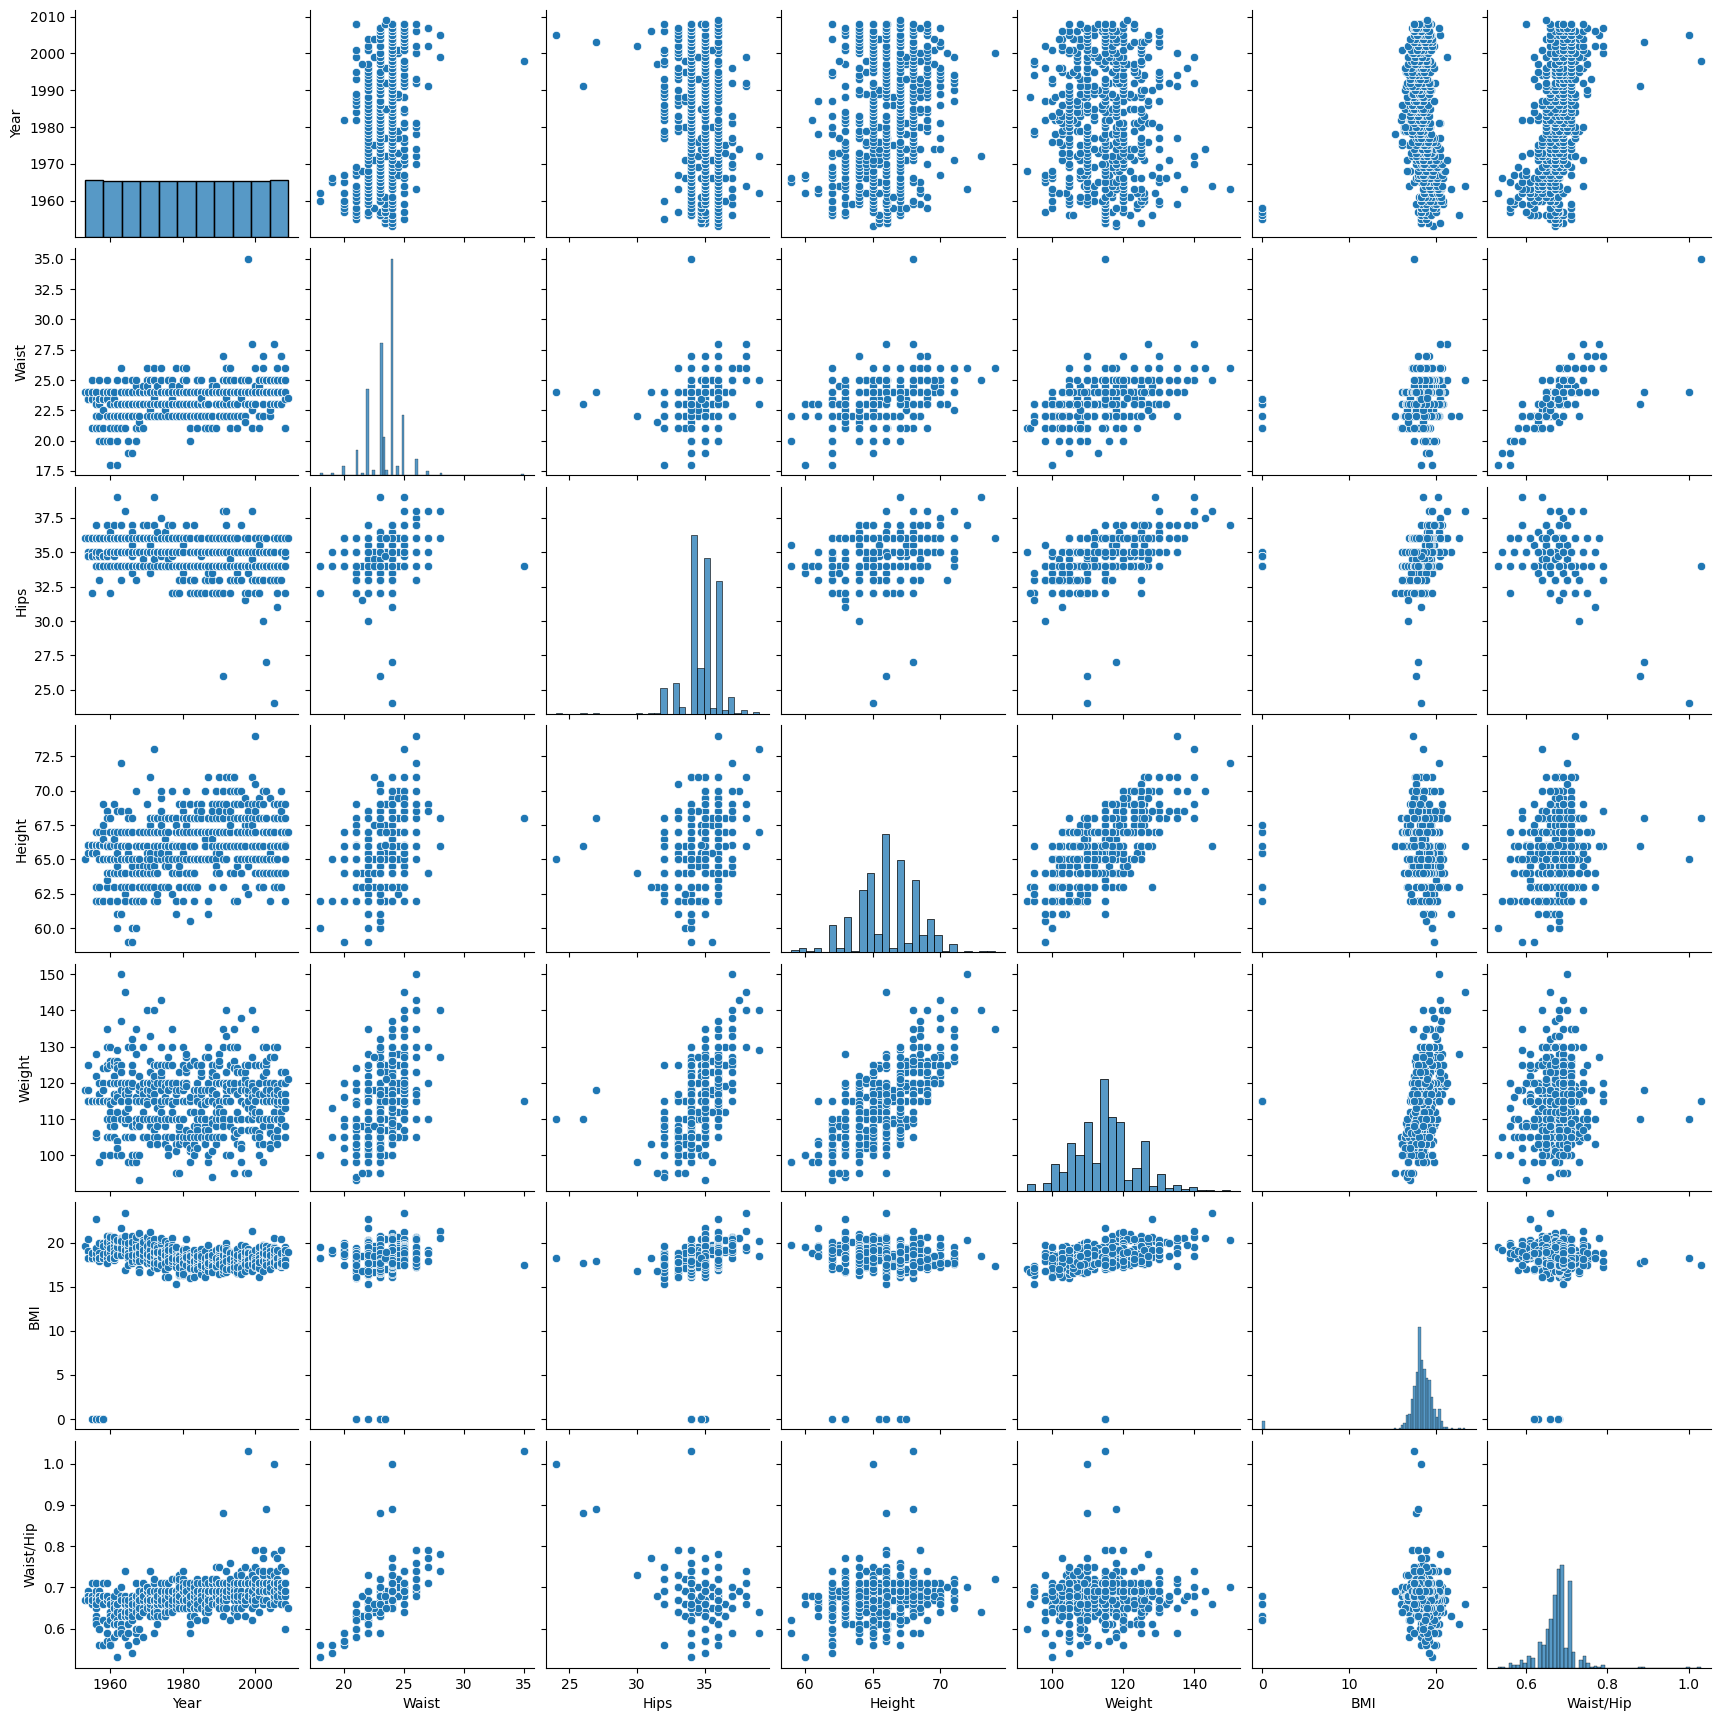

In [100]:
sns.pairplot(model_data)

Структура похожа на изученную нами тепловую матрицу корреляций. На осях х и у расположились признаки из набора данных. На главной диагонали вместо единиц представлены графики-распределения конкретной величины. В остальных ячейках мы можем увидеть точечный график связей признаков между собой — это scatterplot, который мы строили для пары признаков. Здесь это пара признаков, которые пересекаются между собой.

?Что мы можем увидеть в таком графике? Признаки weight (вес модели) и height (рост модели) распределены почти нормально, они выделены на рисунке ниже красным кругом. Это видно на графике распределения. 

Из прошлых юнитов мы знаем, что распределение роста и веса заранее будет ожидаемо нормальным. 

Также интересна связь на пересечении двух признаков. Диаграмма рассеяния линейна, вытянута вдоль прямой. Она положительна — с увеличением одной переменной растёт значение другой. Она ближе к сильной связи — точки расположены близко друг к другу. Можно сделать предположение о коэффициенте корреляции примерно ~0,7.

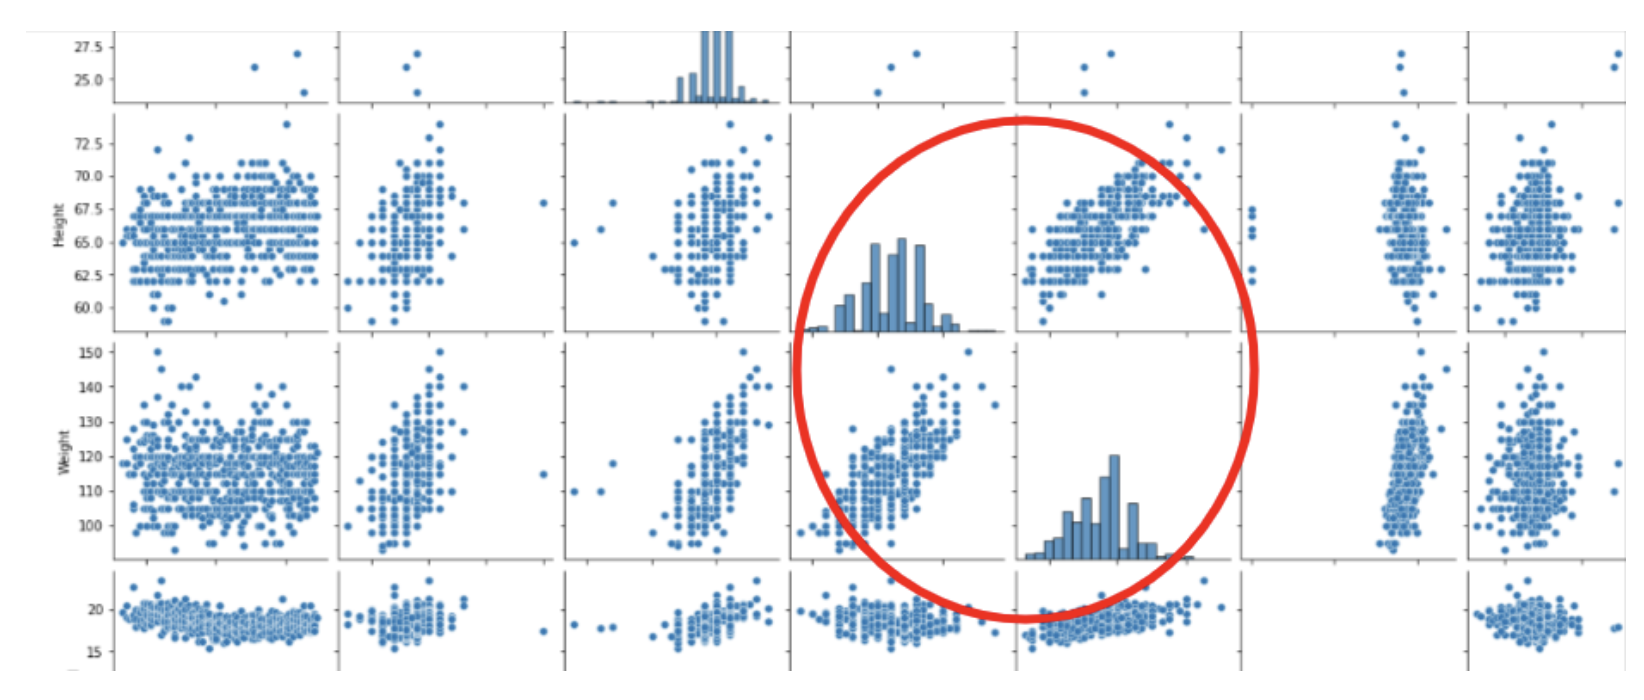